# Лабораторная работа №1 

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [46]:
import os
os.chdir("C:/Users/вячеслав/Desktop/Lab_01/Lab_01/")

In [47]:
df = pd.read_csv('Winequality-red.csv', sep=';')

In [48]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# смотрим на размерность матрицы данных
df.shape

(1599, 12)

In [50]:
# смотрим сбалансированы ли классы, они не сбалансированы 
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [165]:
#from sklearn.metrics import balanced_accuracy_score

In [51]:
# разделяем предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 11].values 

In [122]:
# разделяем на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)  

In [147]:
# Задаем параметры модели
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               min_impurity_decrease=0.001,
                               class_weight=None,
                               min_weight_fraction_leaf=0,
                               presort=False,                               
                               splitter='best',
                               max_features = None)

# Обучаем модель
# model.fit(X_train, y_train)

In [148]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV

In [149]:
# Определяем тестируемые значения гиперпараметров
params_set = {
'max_depth': [ 4, 5, 6, 7, 8, 9, 10, 11],
'min_samples_leaf': [ 4, 5, 6, 7, 8, 9, 10, 11],
'min_samples_split': [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
}

In [168]:
# Проводим 5-fold кросс-валидацию  
grid_CV_1 = GridSearchCV(estimator=model,
       param_grid=params_set,
       scoring='accuracy',
       cv=5,
       n_jobs=-1)

In [169]:
# Обучение на обучающей выборке
grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.001,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11],
   

In [152]:
# Лучший набор значений гиперпараметров
best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [153]:
# Значение критерия качества для лучших значений гиперпараметров 
best_CV_score = grid_CV_1.best_score_
print('Лучшее accuracy', best_CV_score)

Лучшее accuracy 0.6020328381548085


In [154]:
# Лучшая модель
best_model = grid_CV_1.best_estimator_

# accuracy на тестовом множестве для лучшей модели
test_acc = best_model.score(X_test,y_test)

# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.571875


In [172]:
# Смотрим на матрицу ошибок
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)
conf_mat

,3,4,5,6,7,8
3,0,0,1,1,0,0
4,0,0,2,4,2,0
5,0,0,91,46,1,0
6,0,2,33,76,18,2
7,0,0,2,21,16,0
8,0,0,0,2,0,0


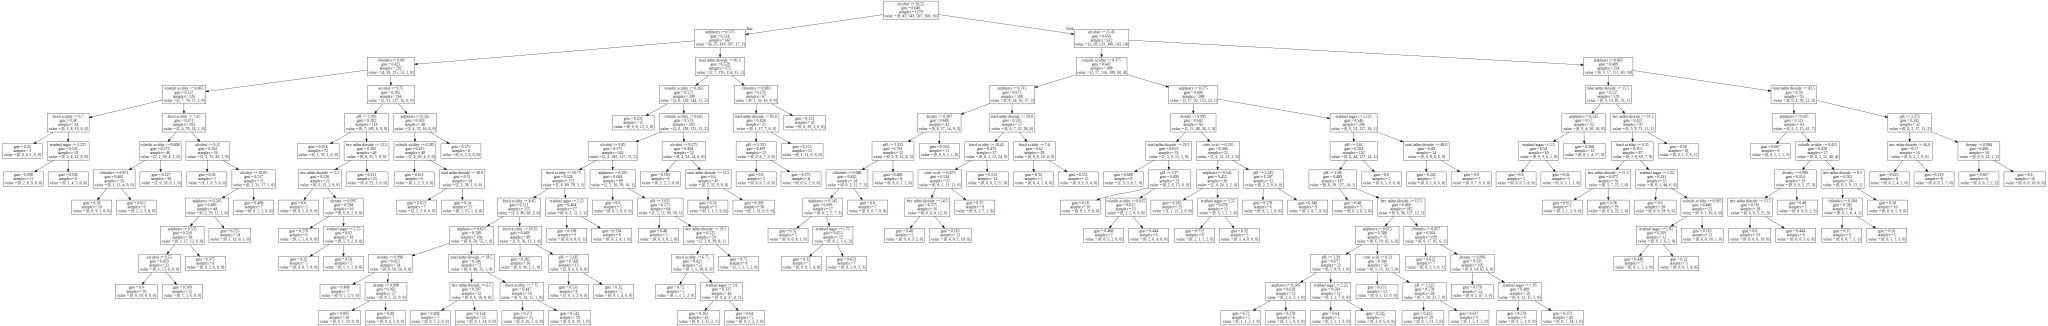

In [170]:
# Смотрим на неше получившиеся дерево
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(best_model, out_file=None, feature_names=df.iloc[:, :-1].columns))